In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
df1=pd.read_excel('附件.xlsx',sheet_name='表单1')
#数据处理：缺失值填充

铅钡    28
高钾     6
Name: 类型, dtype: int64
高钾    12
铅钡    12
Name: 类型, dtype: int64
浅蓝    16
蓝绿     9
深绿     4
紫      2
黑      2
浅绿     1
Name: 颜色, dtype: int64
浅蓝    8
蓝绿    6
深绿    3
深蓝    2
紫     2
浅绿    2
绿     1
Name: 颜色, dtype: int64
C    17
A    11
B     6
Name: 纹饰, dtype: int64
C    13
A    11
Name: 纹饰, dtype: int64


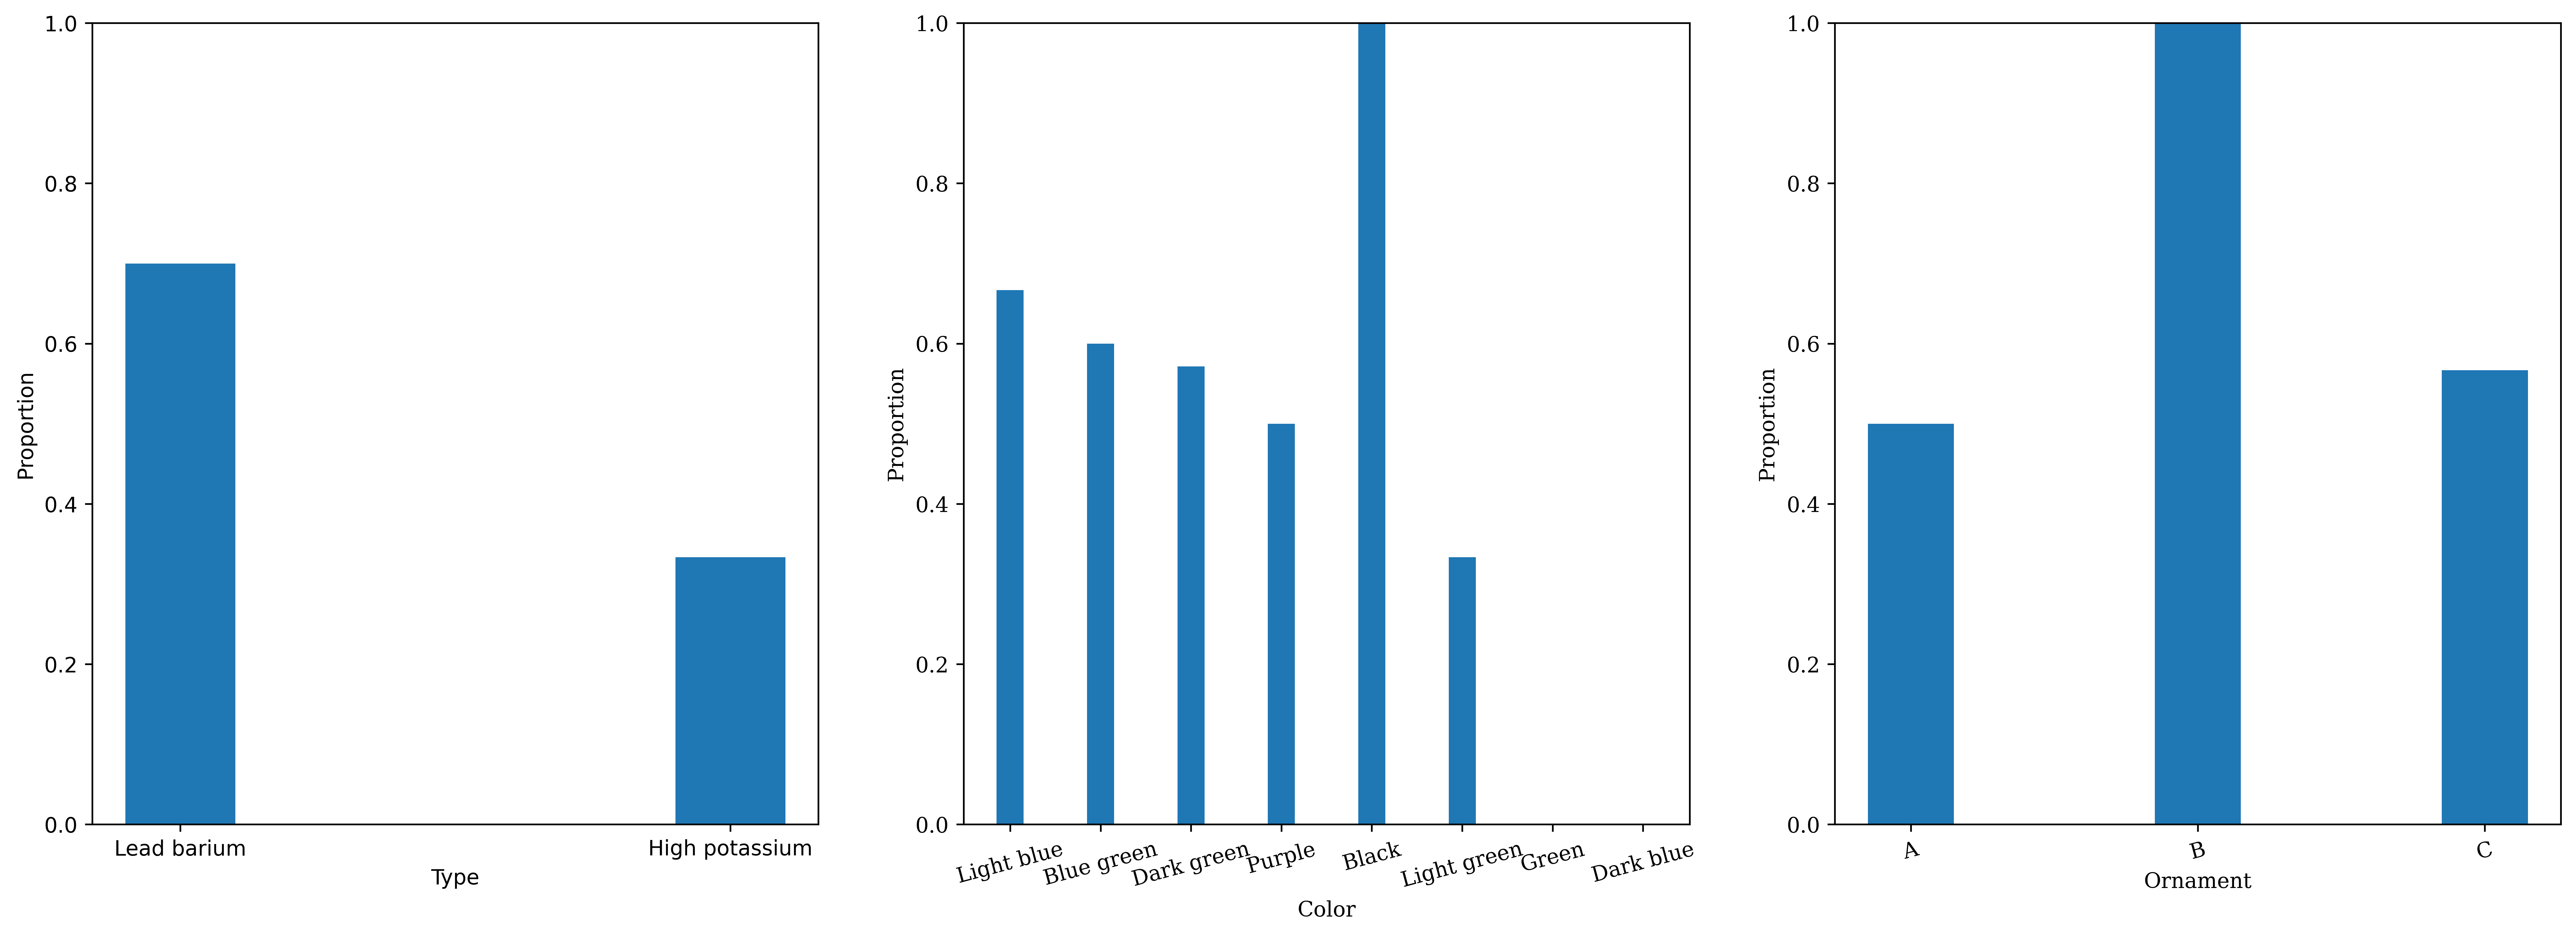

In [2]:
#index 18 39 47 缺失
df1[(df1['纹饰']=='A') & (df1['类型']=='铅钡')&(df1['表面风化']=='风化')]['颜色'].value_counts()
df1[(df1['纹饰']=='C') & (df1['类型']=='铅钡')&(df1['表面风化']=='风化')]['颜色'].value_counts()
df2=df1.fillna('浅蓝')
print(df2[(df2['表面风化']=='风化')]['类型'].value_counts())
print(df2[(df2['表面风化']=='无风化')]['类型'].value_counts())
print(df2[(df2['表面风化']=='风化')]['颜色'].value_counts())
print(df2[(df2['表面风化']=='无风化')]['颜色'].value_counts())
print(df2[(df2['表面风化']=='风化')]['纹饰'].value_counts())
print(df2[(df2['表面风化']=='无风化')]['纹饰'].value_counts())

plt.figure(figsize=(21,7),dpi=600)
ax1=plt.subplot(131)
plt.rcParams['font.family']='serif'
plt.bar(['Lead barium','High potassium'],[28/40,6/18],width=0.2)
plt.xlabel('Type')
plt.ylabel('Proportion')
plt.ylim(0,1)
ax2=plt.subplot(132)
plt.bar(['Light blue','Blue green','Dark green','Purple','Black','Light green','Green','Dark blue'],[16/24,9/15,4/7,2/4,1,1/3,0,0],width=0.3)
plt.xticks(rotation=15)
plt.xlabel('Color')
plt.ylabel('Proportion')
plt.ylim(0,1)
ax3=plt.subplot(133)
plt.bar(['A','B','C'],[11/22,6/6,17/30],width=0.3)
plt.xticks(rotation=15)
plt.xlabel('Ornament')
plt.ylabel('Proportion')
plt.ylim(0,1)
plt.savefig('data_explore.jpg')


df3=pd.get_dummies(df2,columns=['纹饰','类型','颜色'])
# for i in range(len(df3)):
#     if(df3['表面风化'][i]=='无风化'):
#         df3['表面风化'][i]=0
#     elif(df3['表面风化'][i]=='风化'):
#         df3['表面风化'][i]=1
# df3=df3.drop(['文物编号'],axis=1)
# df3['intercept']=1.0
# df3=df3.astype(float)
# train_cols=df3.columns[1:].values.tolist()
# del train_cols[10]
# del train_cols[9]
# df3.head(1)
#
# train_cols=df2.columns[1:]
# df3=df2[train_cols]
# df3

In [3]:
#信息熵确定
def infor(data):
    a = pd.value_counts(data) / len(data)
    # print('信息熵',sum(np.log2(a) * a * (-1)))
    # print(a)
    # print(np.log2(a))

    return sum(np.log2(a) * a * (-1))
infor(df3['表面风化'])

0.9784493292686189

In [653]:
#信息增益确定 str1-X str2-Y
def g(data, str1, str2):
    e1 = data.groupby(str1).apply(lambda x: infor(x[str2]))
    p1 = pd.value_counts(data[str1]) / len(data[str1])
    e2 = sum(e1 * p1)
    # print('条件熵：',e2)

    return infor(data[str2]) - e2

# print(g(df3,'表面风化','纹饰'))
# print(g(df3,'表面风化','类型'))
# print(g(df3,'表面风化','颜色'))

print(g(df3,'纹饰','表面风化'))
print(g(df3,'类型','表面风化'))
print(g(df3,'颜色','表面风化'))

0.08855048045541913
0.08567413992019612
0.1119865122249808


In [654]:
#信息增益率确定：str1-X str2-Y
def gr(data, str1, str2):
   return g(data, str1, str2) / infor(data[str1])
print('信息增益率：')
# print(gr(df3,'表面风化','纹饰'))
# print(gr(df3,'表面风化','类型'))
# print(gr(df3,'表面风化','颜色'))

print(gr(df3,'纹饰','表面风化'))
print(gr(df3,'类型','表面风化'))
print(gr(df3,'颜色','表面风化'))
'''
即类型对表面风化的影响最大，纹饰次之，最后一个是颜色
'''

信息增益率：
0.06506205768739455
0.09587836912092951
0.0482148439497323


'\n即类型对表面风化的影响最大，纹饰次之，最后一个是颜色\n'

In [655]:

df2=pd.read_excel('附件.xlsx',sheet_name='表单2')
df2=df2.fillna(0)
cols=df2.columns[1:]

In [656]:
df2_1=df2[cols]
drop_index=[]
type_index=[]
for i in range(len(df2_1)):
    if(85>sum(df2_1.iloc[i].values) and sum(df2_1.iloc[i].values)>105):
        drop_index.append(i)

print(len(drop_index))

0


In [657]:
K_list=df1[(df1['类型']=='高钾')]['文物编号'].values.tolist()
Ba_list=df1[(df1['类型']=='铅钡')]['文物编号'].values.tolist()
list_0=df1[(df1['表面风化']=='无风化')]['文物编号'].values.tolist()
list_1=df1[(df1['表面风化']=='风化')]['文物编号'].values.tolist()
K_list

[1, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 21, 22, 27]

In [658]:
df1[(df1['类型']=='高钾')]

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化
5,6,A,高钾,蓝绿,无风化
6,7,B,高钾,蓝绿,风化
8,9,B,高钾,蓝绿,风化
9,10,B,高钾,蓝绿,风化
11,12,B,高钾,蓝绿,风化
12,13,C,高钾,浅蓝,无风化


In [659]:
f_list=[]
type_list=[]
for i in range(len(df2)):
    if(df2['文物采样点'][i][0]=='0'):
        if(int(df2['文物采样点'][i][1]) in K_list):
            type='高钾'
            # print(i,type)
        elif(int(df2['文物采样点'][i][1]) in Ba_list):
            type='铅钡'
    else:
        if(int(df2['文物采样点'][i][:2]) in K_list):
            type='高钾'
        elif(int(df2['文物采样点'][i][:2]) in Ba_list):
            type='铅钡'

    if(df2['文物采样点'][i][0]=='0'):
        if(int(df2['文物采样点'][i][1]) in list_0):
            f_index='无风化'
        elif(int(df2['文物采样点'][i][1]) in list_1):
            f_index='风化'
    else:
        if(int(df2['文物采样点'][i][:2]) in list_0):
            f_index='无风化'
        elif(int(df2['文物采样点'][i][:2]) in list_1):
            f_index='风化'

    type_list.append(type)
    f_list.append(f_index)
df2['类型']=type_list
df2['表面风化']=f_list
df_K=df2[(df2['类型']=='高钾')]
df_Ba=df2[(df2['类型']=='铅钡')]
df_Ba.to_csv('Ba.csv')

In [660]:
df2.to_csv('total.csv')

In [661]:
X_arr=df_K['二氧化硅(SiO2)'].values+df_K['氧化钾(K2O)'].values+df_K['氧化钙(CaO)'].values
df_K['主要成分']=X_arr

C:\Users\Bingbing\AppData\Local\Temp/ipykernel_16220/1942233990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_K['主要成分']=X_arr


In [662]:
df_K_1=pd.DataFrame(df_K[(df_K['表面风化']=='无风化')][['主要成分','文物采样点']]).sort_values(by='主要成分')
pre_x=df_K_1['主要成分'].describe()
pre_x

count    14.000000
mean     80.535714
std       7.671868
min      66.420000
25%      76.235000
50%      80.815000
75%      84.975000
max      94.250000
Name: 主要成分, dtype: float64

In [663]:
df_K_1=df_K.drop(columns=['文物采样点','二氧化硅(SiO2)','氧化钾(K2O)','氧化钙(CaO)','类型','表面风化'])
corr_K=df_K_1.corr(method='spearman')
pd.DataFrame(corr_K['主要成分']).to_csv('corr_K.csv')

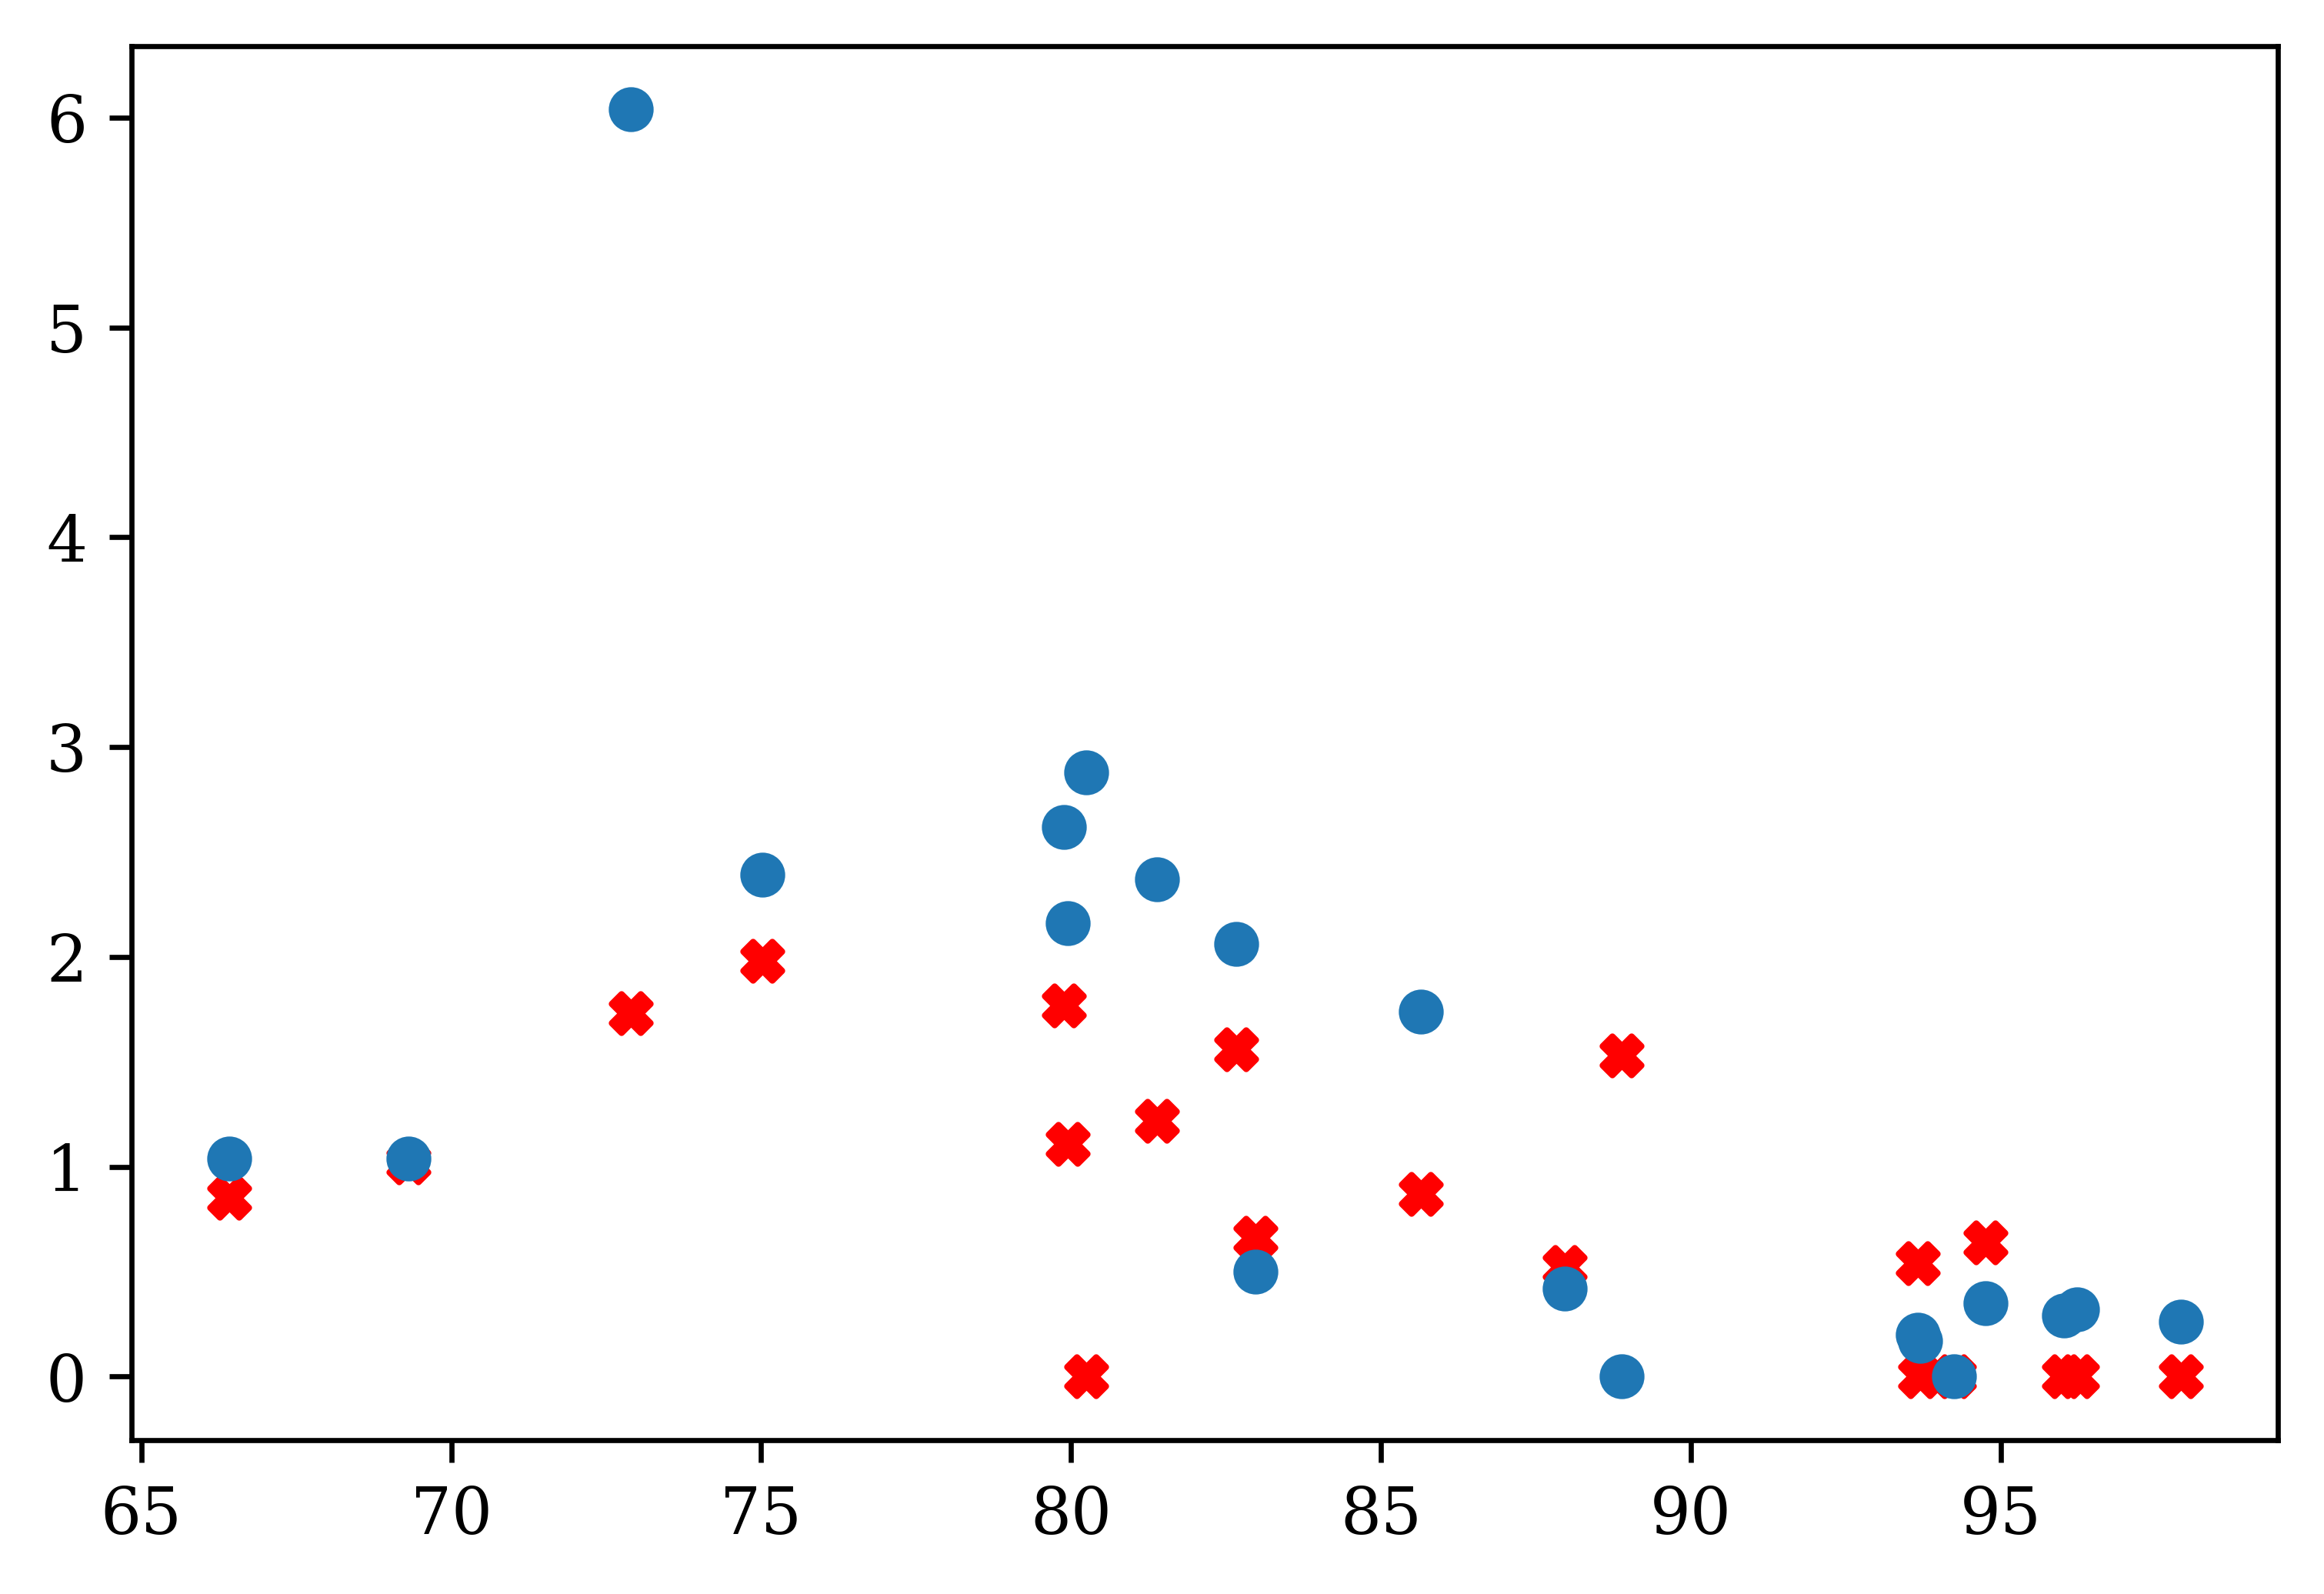

In [664]:
df_K_2=df_K_1.sort_values(by='主要成分')
plt.figure(dpi=600)
plt.scatter(df_K_2['主要成分'],df_K_2['氧化镁(MgO)'],marker='X',c='r')
plt.scatter(df_K_2['主要成分'],df_K_2['氧化铁(Fe2O3)'],marker='o')
# plt.scatter(df_K_2['主要成分'],df_K_2['五氧化二磷(P2O5)'],marker='s')
# plt.scatter(df_K_2['主要成分'],df_K_2['氧化锶(SrO)'],marker='*')


In [665]:
df_K_2.to_csv('K.csv')

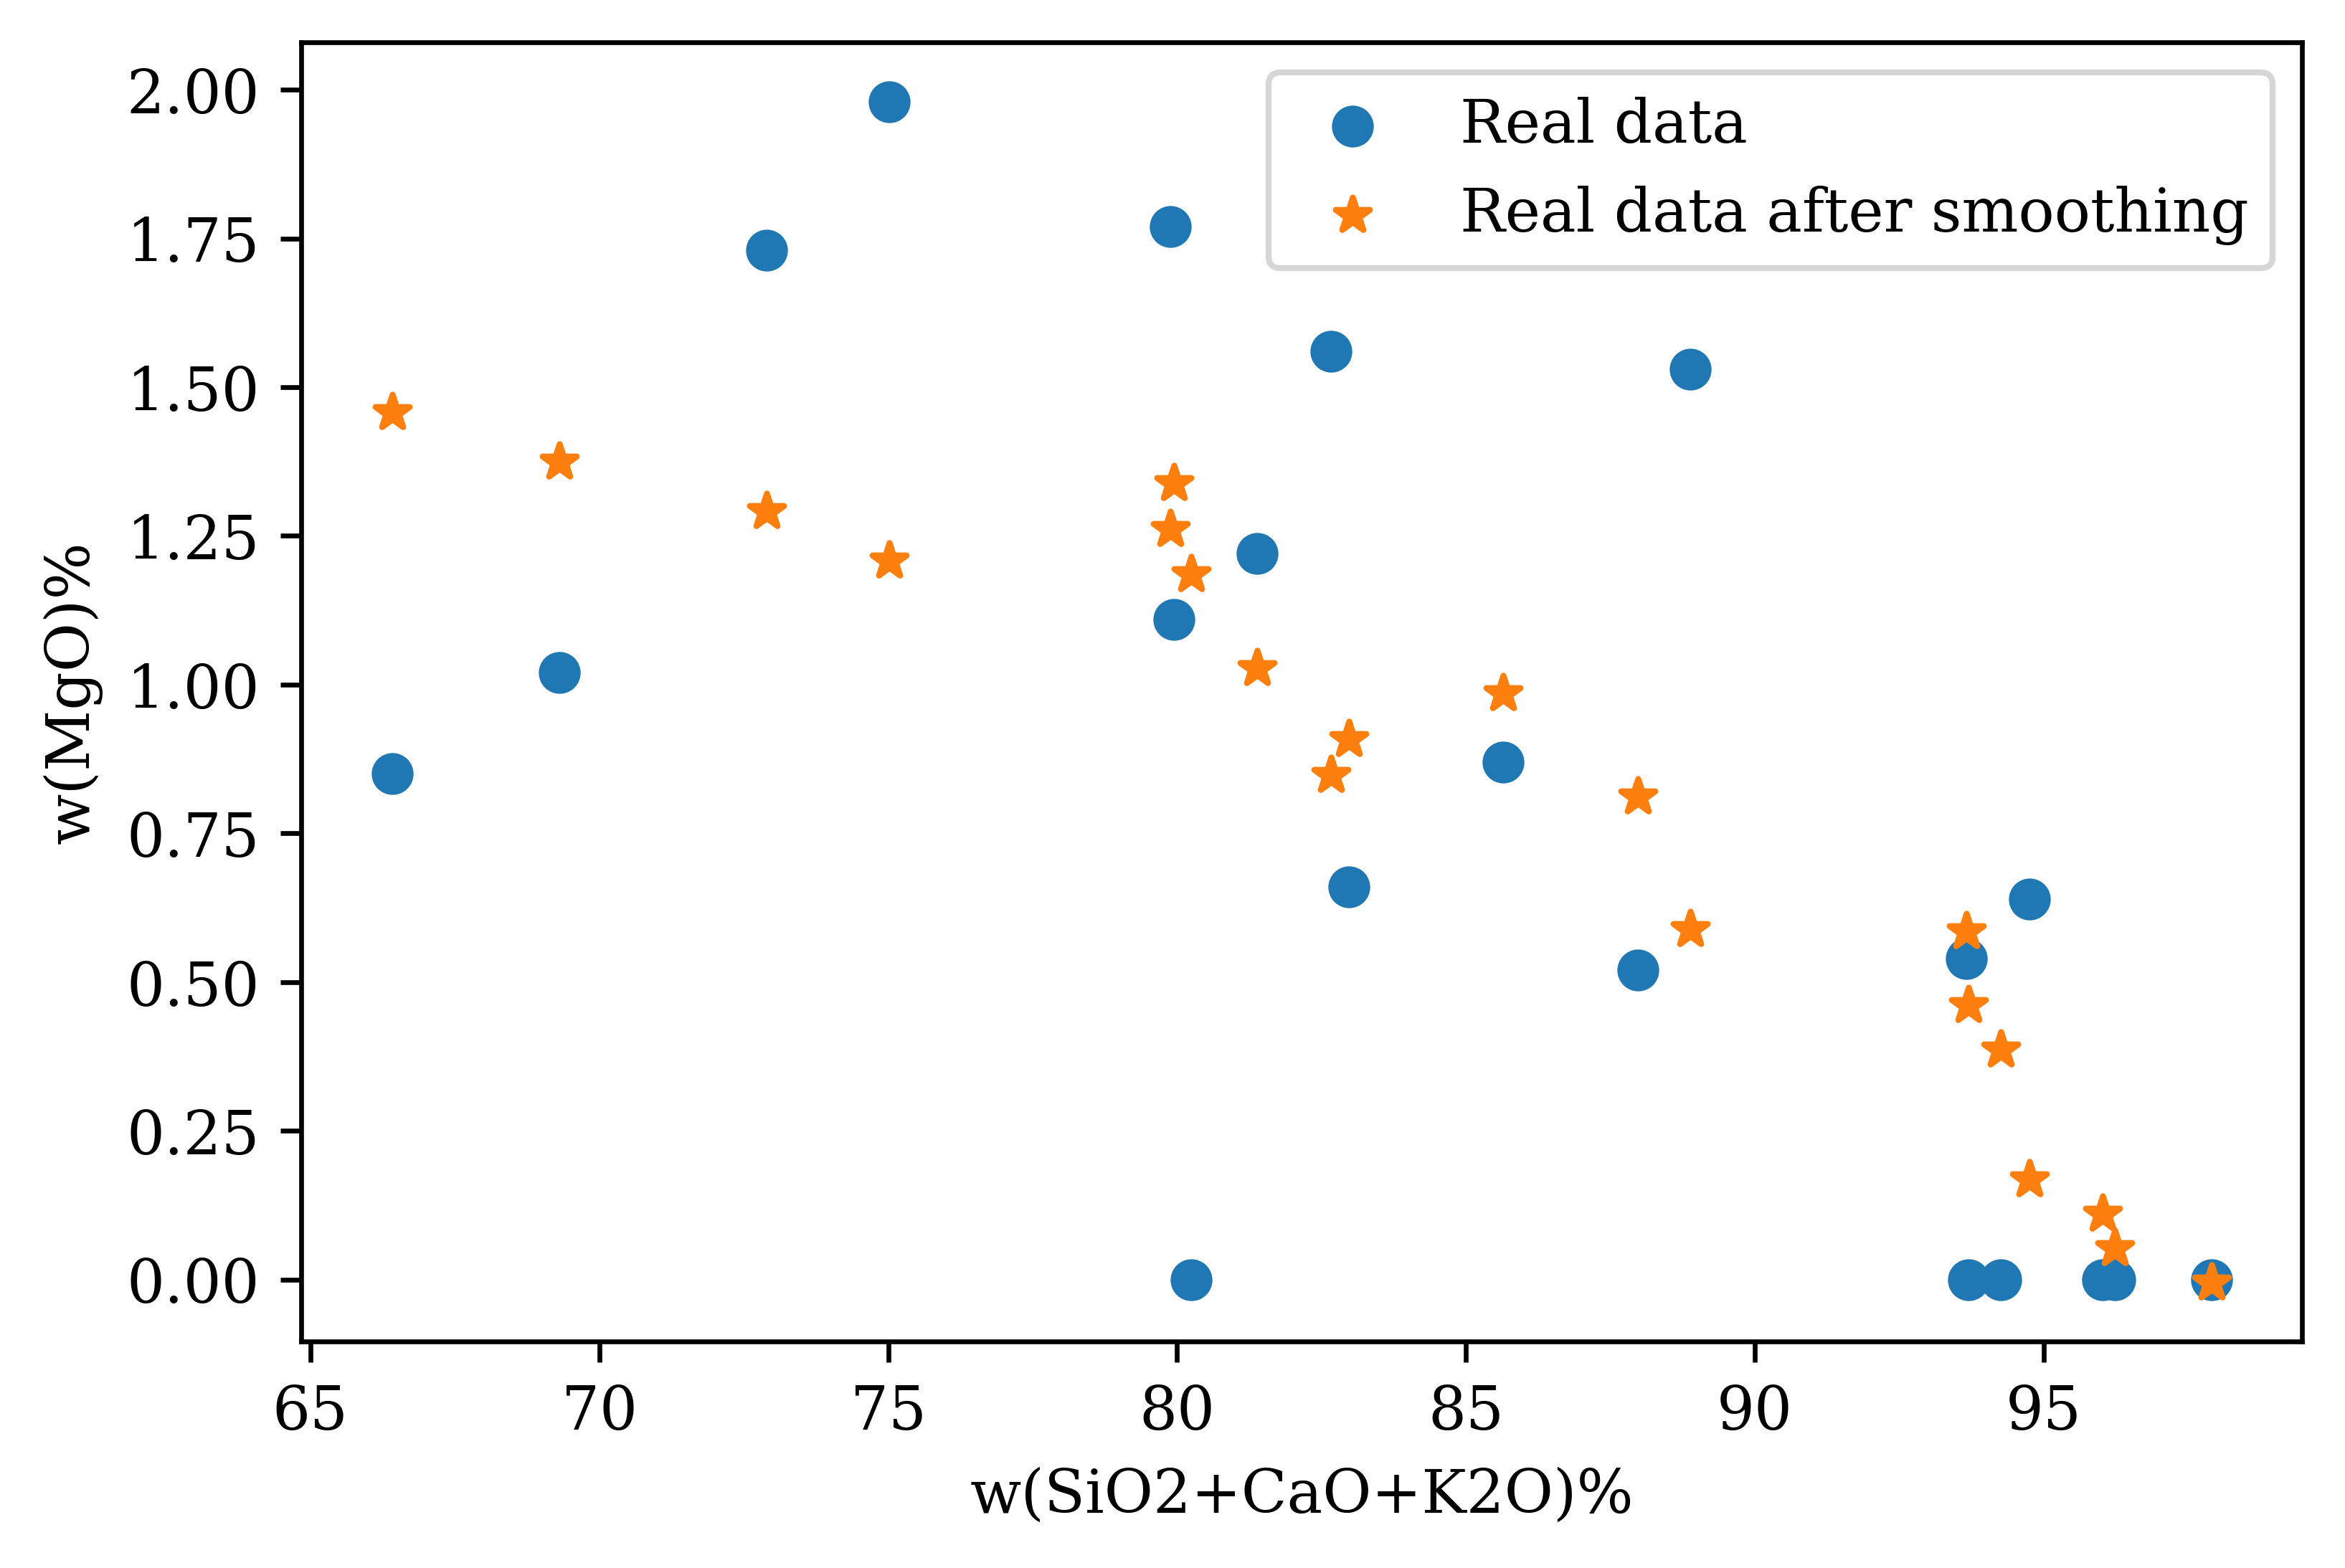

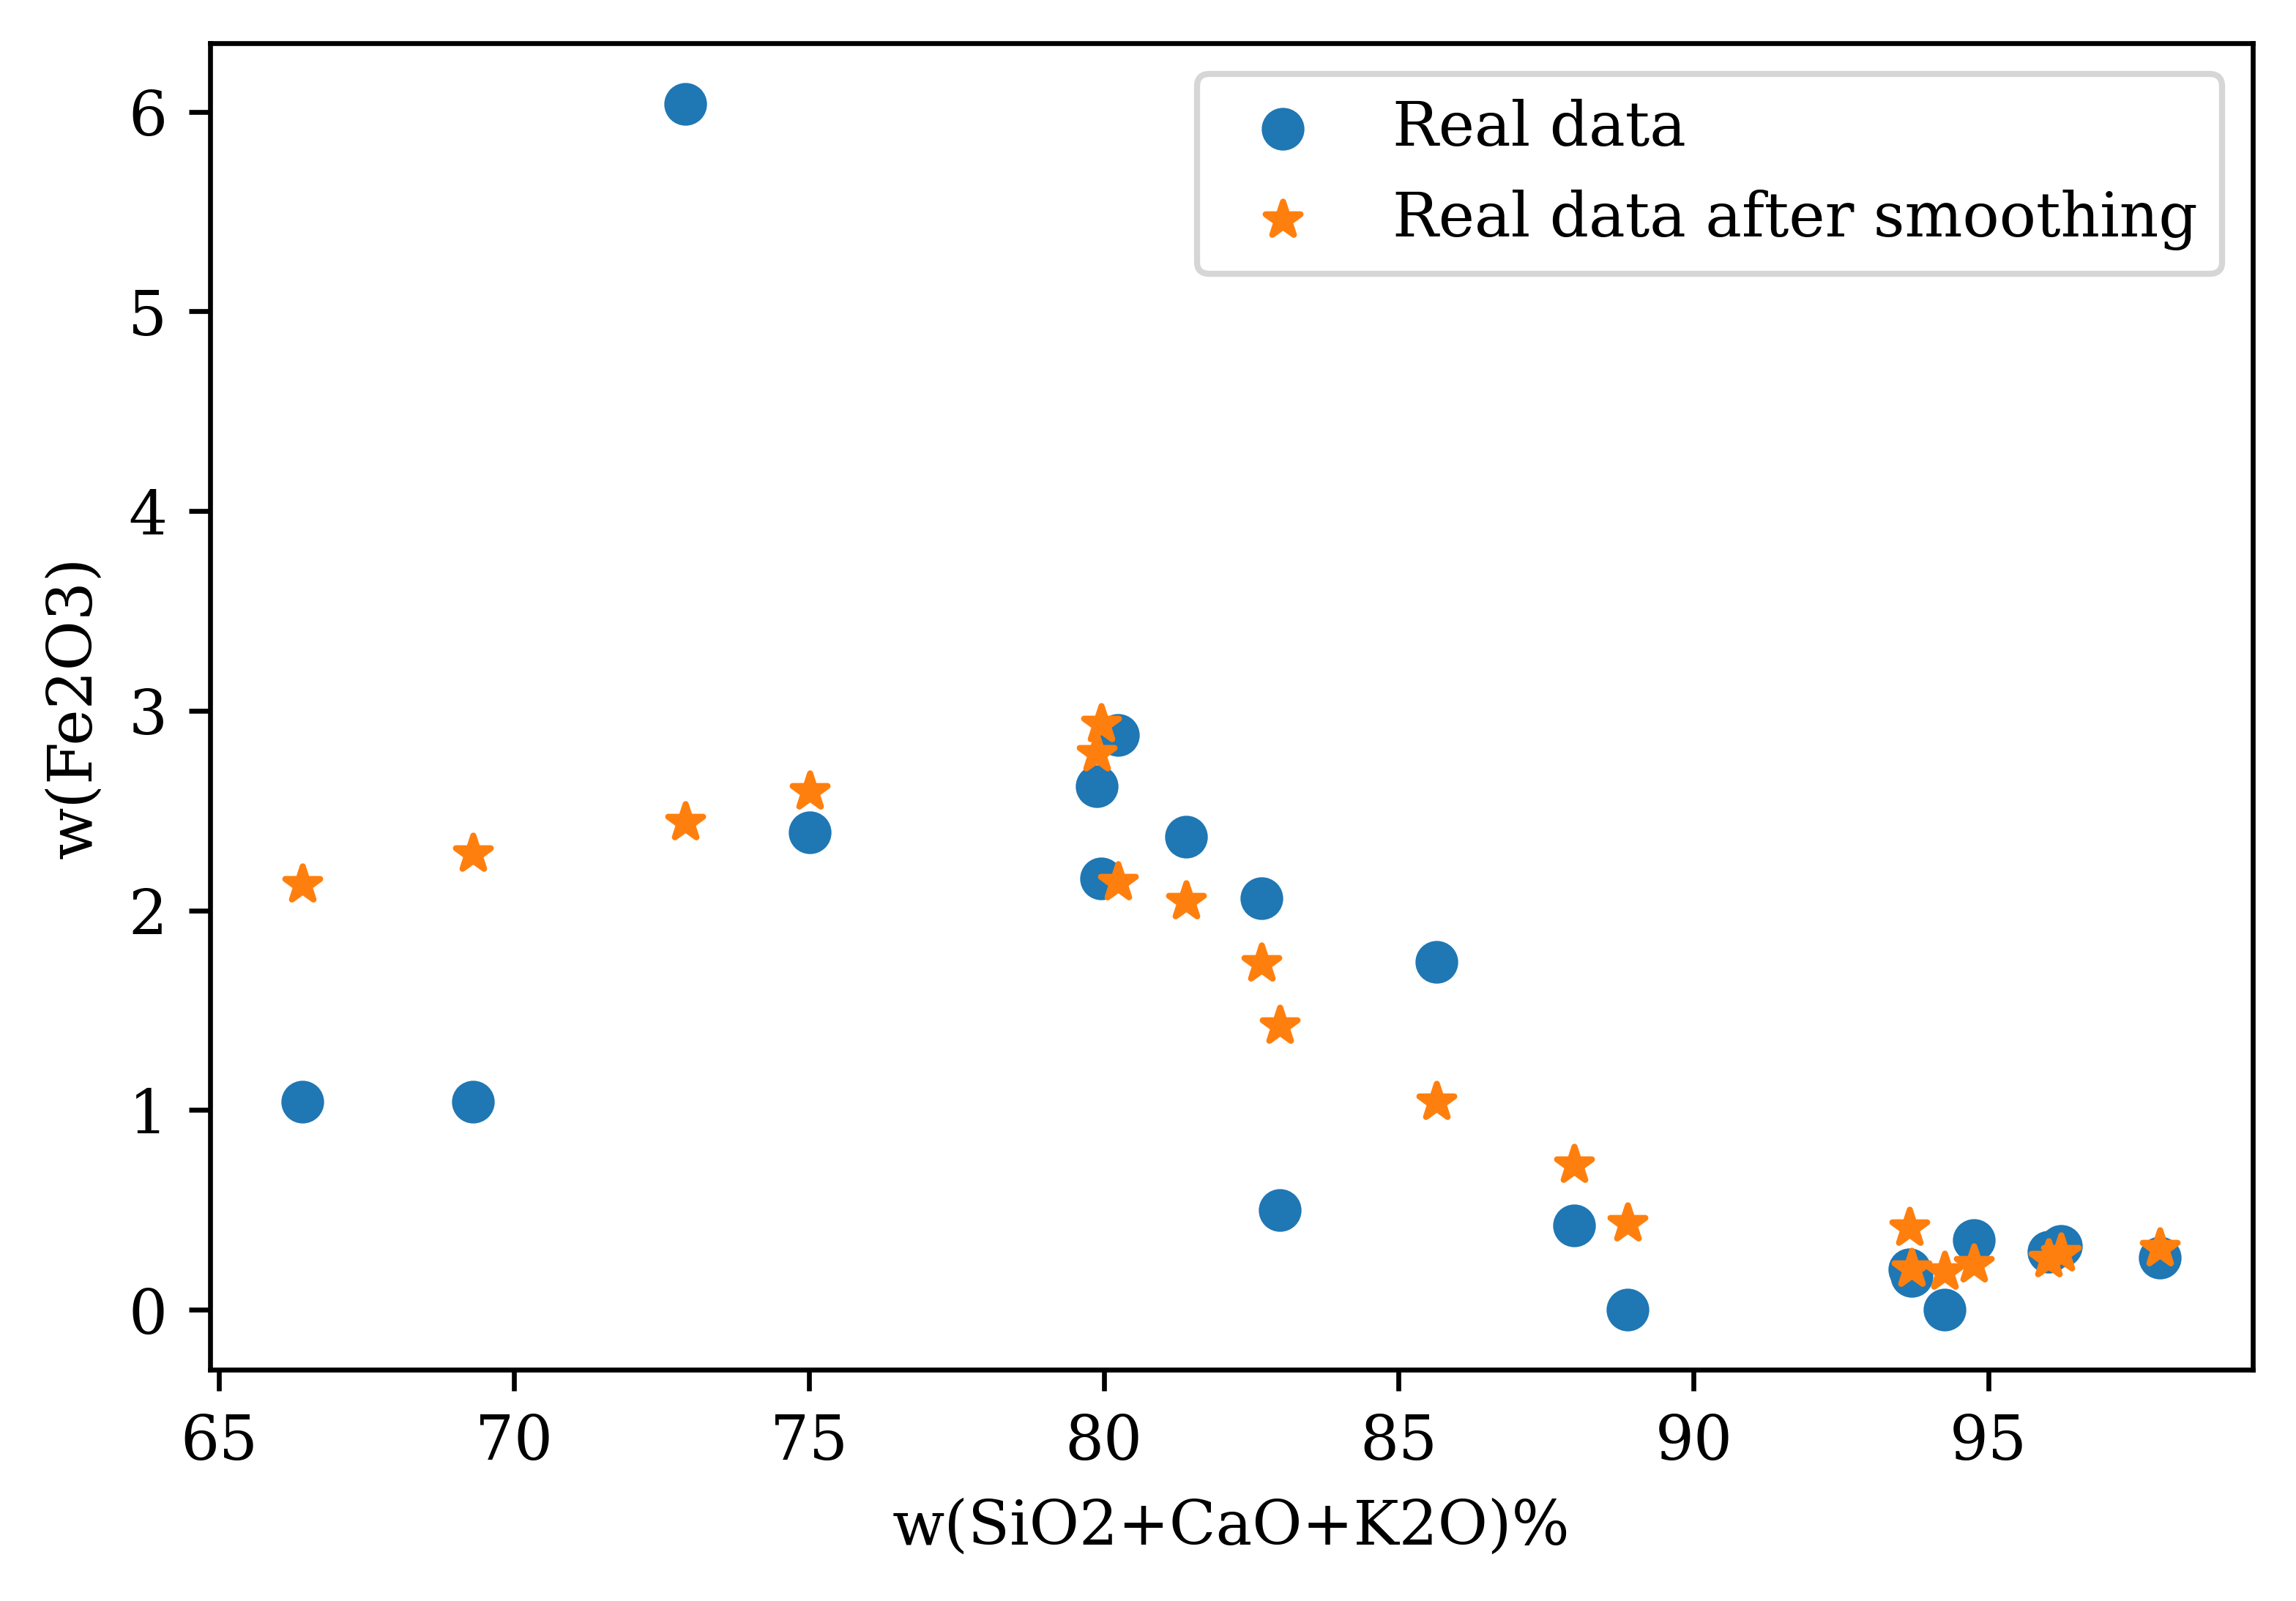

In [666]:
#平滑数据
from scipy.signal import savgol_filter
def smoothing(df_K_2=df_K_2,index='氧化镁(MgO)',xlabel='w(SiO2+CaO+K2O)%',ylabel='w(MgO)%'):
    plt.figure(dpi=600)
    plt.scatter(df_K_2['主要成分'],df_K_2[index],label='Real data')
    plt.scatter(df_K_2['主要成分'],savgol_filter(df_K_2[index],7,1),marker='*',label='Real data after smoothing')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.savefig(index+'smoothing_1.jpg')
    return savgol_filter(df_K_2[index],7,1)
y_mg_sm=smoothing()
y_fe_sm=smoothing(df_K_2,index='氧化铁(Fe2O3)',ylabel='w(Fe2O3)')

In [667]:
#指数拟合（论文中未使用，仅在建模初期尝试这种方法）
from scipy.optimize import curve_fit
def func(x, a, b, c,d):
    return -a * np.exp(b * x+c) + d
def ex_curve(xdata,ydata):

    popt, pcov = curve_fit(func,xdata, ydata,maxfev=500000)
    # popt数组中，三个值分别是待求参数a,b,c
    y2 = [func(i, popt[0], popt[1], popt[2],popt[3]) for i in xdata]
    return y2,popt
Mg_p,Mg_popt=ex_curve(df_K_2['主要成分'],y_mg_sm)
Fe_p,Fe_popt=ex_curve(df_K_2['主要成分'],y_fe_sm)

D:\Anacoda\anaconda\envs\BigData\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [668]:
#线性拟合和多项式拟合
model1=np.poly1d(np.polyfit(df_K_2['主要成分'].values.tolist(),y_mg_sm,1))
model2=np.poly1d(np.polyfit(df_K_2['主要成分'].values.tolist(),y_fe_sm,1))


model5=np.poly1d(np.polyfit(df_K_2['主要成分'].values.tolist(),y_mg_sm,2))
model6=np.poly1d(np.polyfit(df_K_2['主要成分'].values.tolist(),y_fe_sm,2))

In [669]:
print(model5)
print(model6)

           2
-0.001431 x + 0.1911 x - 4.98
           2
-0.002997 x + 0.4059 x - 11.26


In [670]:
# #################################拟合优度R^2的计算######################################
def __sst(y_no_fitting):
    """
    计算SST(total sum of squares) 总平方和
    :param y_no_predicted: List[int] or array[int] 待拟合的y
    :return: 总平方和SST
    """
    y_mean = sum(y_no_fitting) / len(y_no_fitting)
    s_list =[(y - y_mean)**2 for y in y_no_fitting]
    sst = sum(s_list)
    return sst


def __ssr(y_fitting, y_no_fitting):
    """
    计算SSR(regression sum of squares) 回归平方和
    :param y_fitting: List[int] or array[int]  拟合好的y值
    :param y_no_fitting: List[int] or array[int] 待拟合y值
    :return: 回归平方和SSR
    """
    y_mean = sum(y_no_fitting) / len(y_no_fitting)
    s_list =[(y - y_mean)**2 for y in y_fitting]
    ssr = sum(s_list)
    return ssr


def __sse(y_fitting, y_no_fitting):
    """
    计算SSE(error sum of squares) 残差平方和
    :param y_fitting: List[int] or array[int] 拟合好的y值
    :param y_no_fitting: List[int] or array[int] 待拟合y值
    :return: 残差平方和SSE
    """
    s_list = [(y_fitting[i] - y_no_fitting[i])**2 for i in range(len(y_fitting))]
    sse = sum(s_list)
    return sse


def goodness_of_fit(y_fitting, y_no_fitting):
    """
    计算拟合优度R^2
    :param y_fitting: List[int] or array[int] 拟合好的y值
    :param y_no_fitting: List[int] or array[int] 待拟合y值
    :return: 拟合优度R^2
    """
    SSR = __ssr(y_fitting, y_no_fitting)
    SST = __sst(y_no_fitting)
    rr = SSR /SST
    return rr

In [671]:
def plot_R(y,Pb_popt,model_lin,model_p,index='氧化铅(PbO)',ylabel='w(PbO)%'):
    plt.figure(dpi=600)
    plt.scatter(df_K_2['主要成分'],y,marker='*')
    plt.plot(df_K_2['主要成分'],model_lin(df_K_2['主要成分']),label='Linear fit',ls='-.',lw=2)
    #plt.plot(df_K_2['主要成分'],[func(i, Pb_popt[0], Pb_popt[1], Pb_popt[2],Pb_popt[3]) for i in df_K_2['主要成分']],label='Exponential fit',ls='--',lw=2)
    plt.plot(df_K_2['主要成分'],model_p(df_K_2['主要成分']),label='Polynomial fit',lw=2,c='r')
    plt.xlabel('w(SiO2+CaO+K2O)%')
    plt.ylabel(ylabel)
    plt.legend()
    plt.savefig(index+'.jpg')
    print('Linear: ',goodness_of_fit(model_lin(df_K_2['主要成分']),y))
    print('Exponential: ',goodness_of_fit([func(i, Pb_popt[0], Pb_popt[1], Pb_popt[2],Pb_popt[3]) for i in df_K_2['主要成分']],y))
    print('Polynomial fit: ',goodness_of_fit(model_p(df_K_2['主要成分']),y))

Linear:  0.8826379680312626
Exponential:  1.4887798570740598e+40
Polynomial fit:  0.9467145013168686


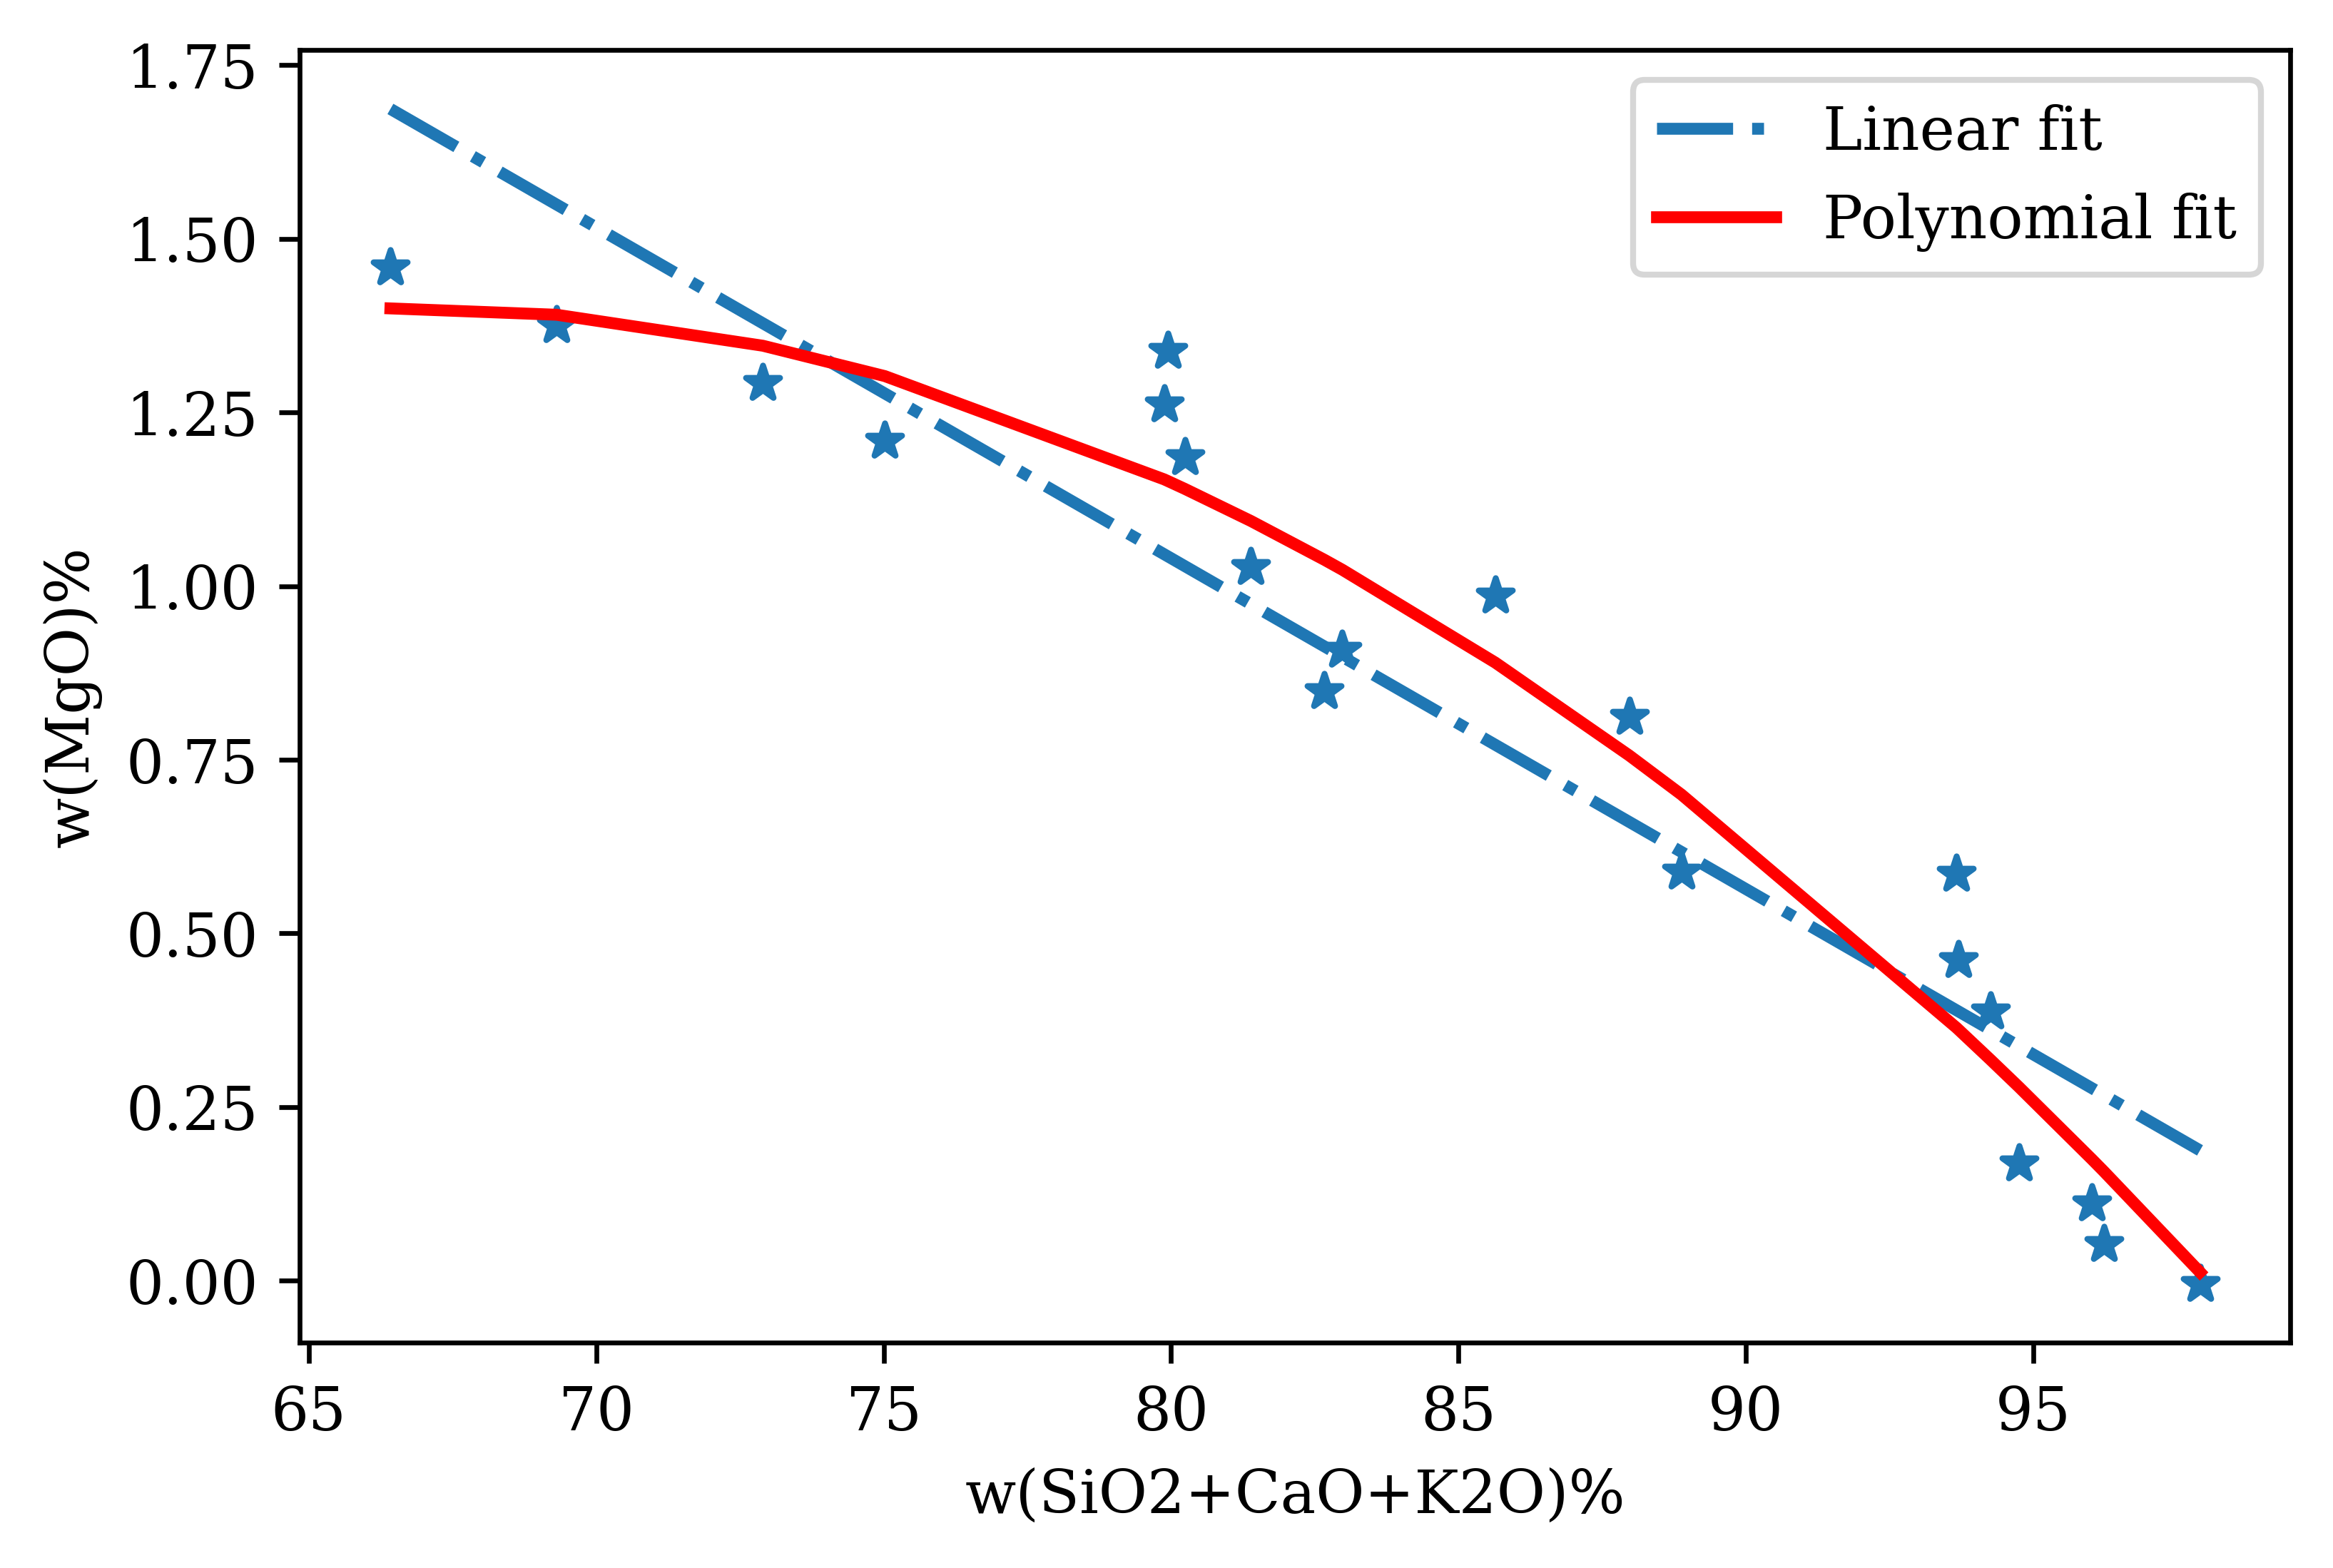

In [672]:
plot_R(index='氧化镁(MgO)',y=y_mg_sm,model_lin=model1,Pb_popt=Mg_popt,model_p=model5,ylabel='w(MgO)%')

Linear:  0.7702433749498527
Exponential:  3.329056845622845e+39
Polynomial fit:  0.8330639884833493


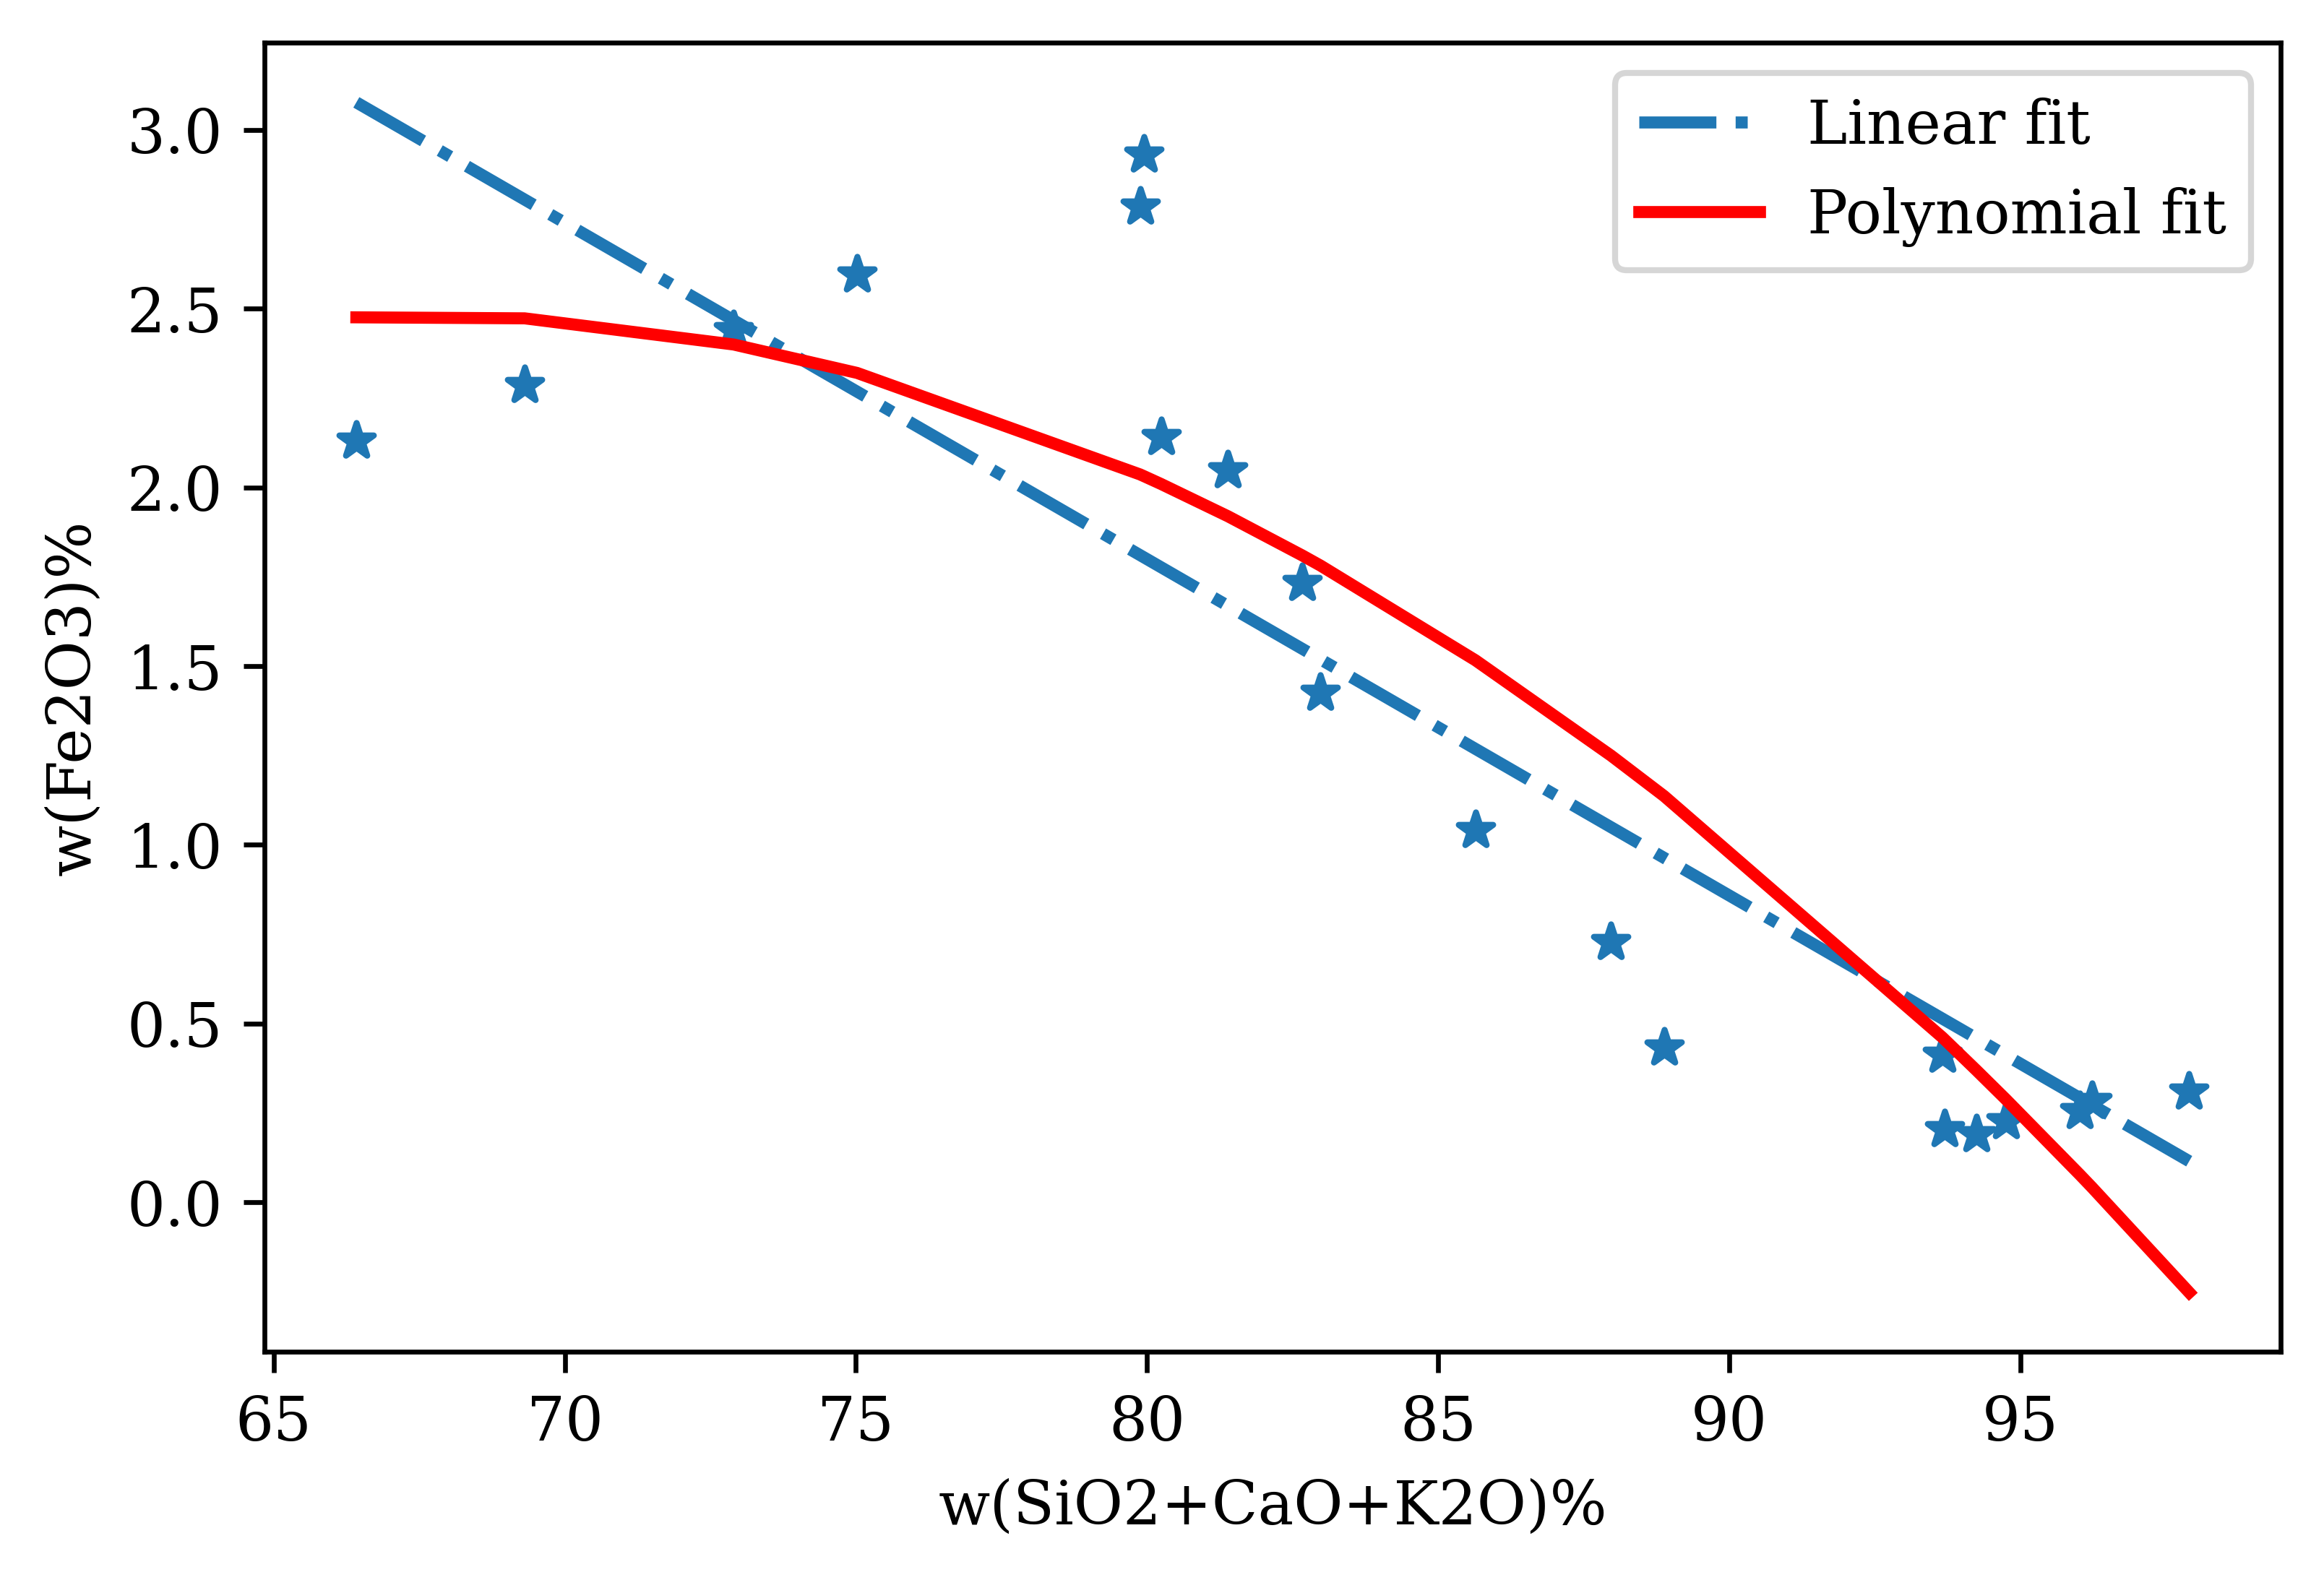

In [673]:
plot_R(index='氧化铁(Fe2O3)',y=y_fe_sm,model_lin=model2,Pb_popt=Fe_popt,model_p=model6,ylabel='w(Fe2O3)%')

In [674]:
#问题结果！！
print(model5([pre_x['25%'],pre_x['75%']]),model6([pre_x['25%'],pre_x['75%']]))

[1.27153111 0.92516503] [2.2624129  1.58645037]


In [675]:
#################################################################################################
df=pd.read_csv('Ba.csv')
df['主要成分'] = df['二氧化硅(SiO2)']+df['氧化钙(CaO)']+df['氧化铅(PbO)']+df['氧化钡(BaO)']
df=df.sort_values(by='主要成分')
#确定无风化玻璃主要成分含量
df1=pd.DataFrame(df[(df['表面风化']=='无风化')][['主要成分','文物采样点']]).sort_values(by='主要成分')
x_pre=df1['主要成分'].describe()
x_pre

count    13.000000
mean     88.768462
std       6.278604
min      70.210000
25%      87.780000
50%      89.070000
75%      91.010000
max      95.860000
Name: 主要成分, dtype: float64

In [676]:
cols_2=df.columns.drop(['文物采样点','类型','表面风化','Unnamed: 0','二氧化硅(SiO2)','氧化钙(CaO)','氧化铅(PbO)','氧化钡(BaO)'])
df[cols_2].corr(method='spearman').to_csv('corr_Ba.csv')

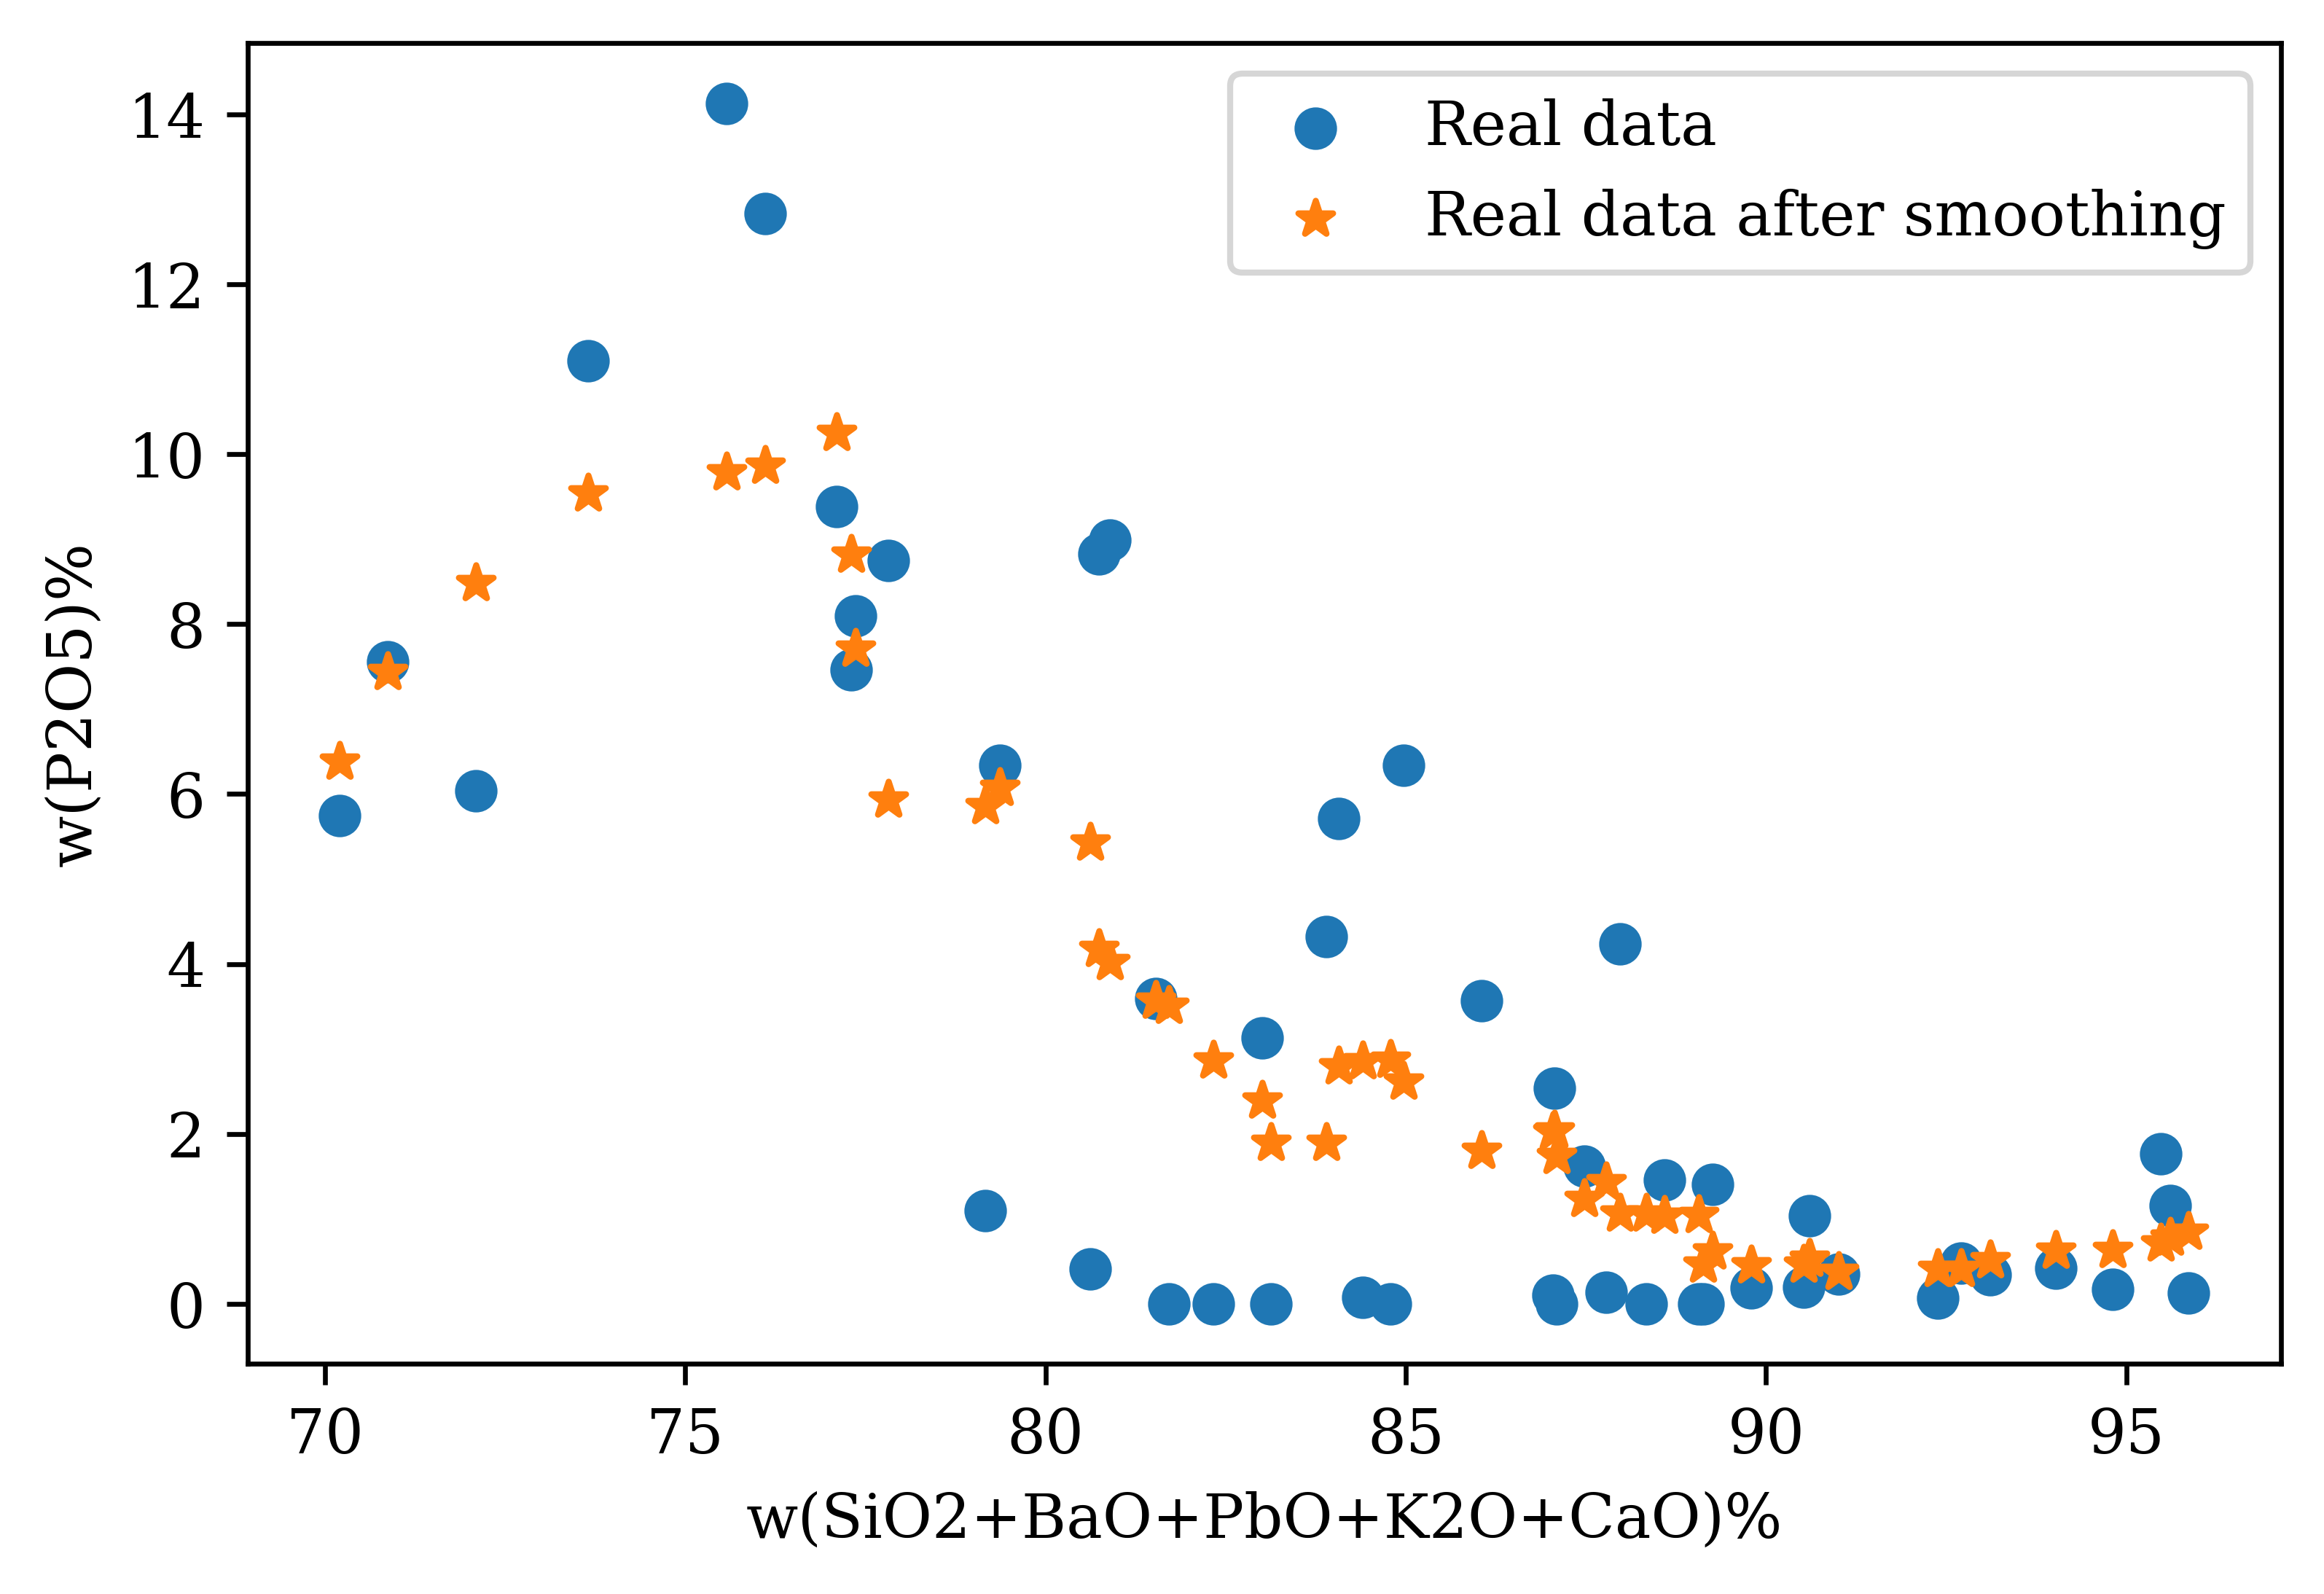

In [677]:
y_P_sm=smoothing(df_K_2=df,index='五氧化二磷(P2O5)',xlabel='w(SiO2+BaO+PbO+K2O+CaO)%',ylabel='w(P2O5)%')

0.9080511369404889
0.7925626488292787
          3         2
0.002605 x - 0.643 x + 52.22 x - 1390


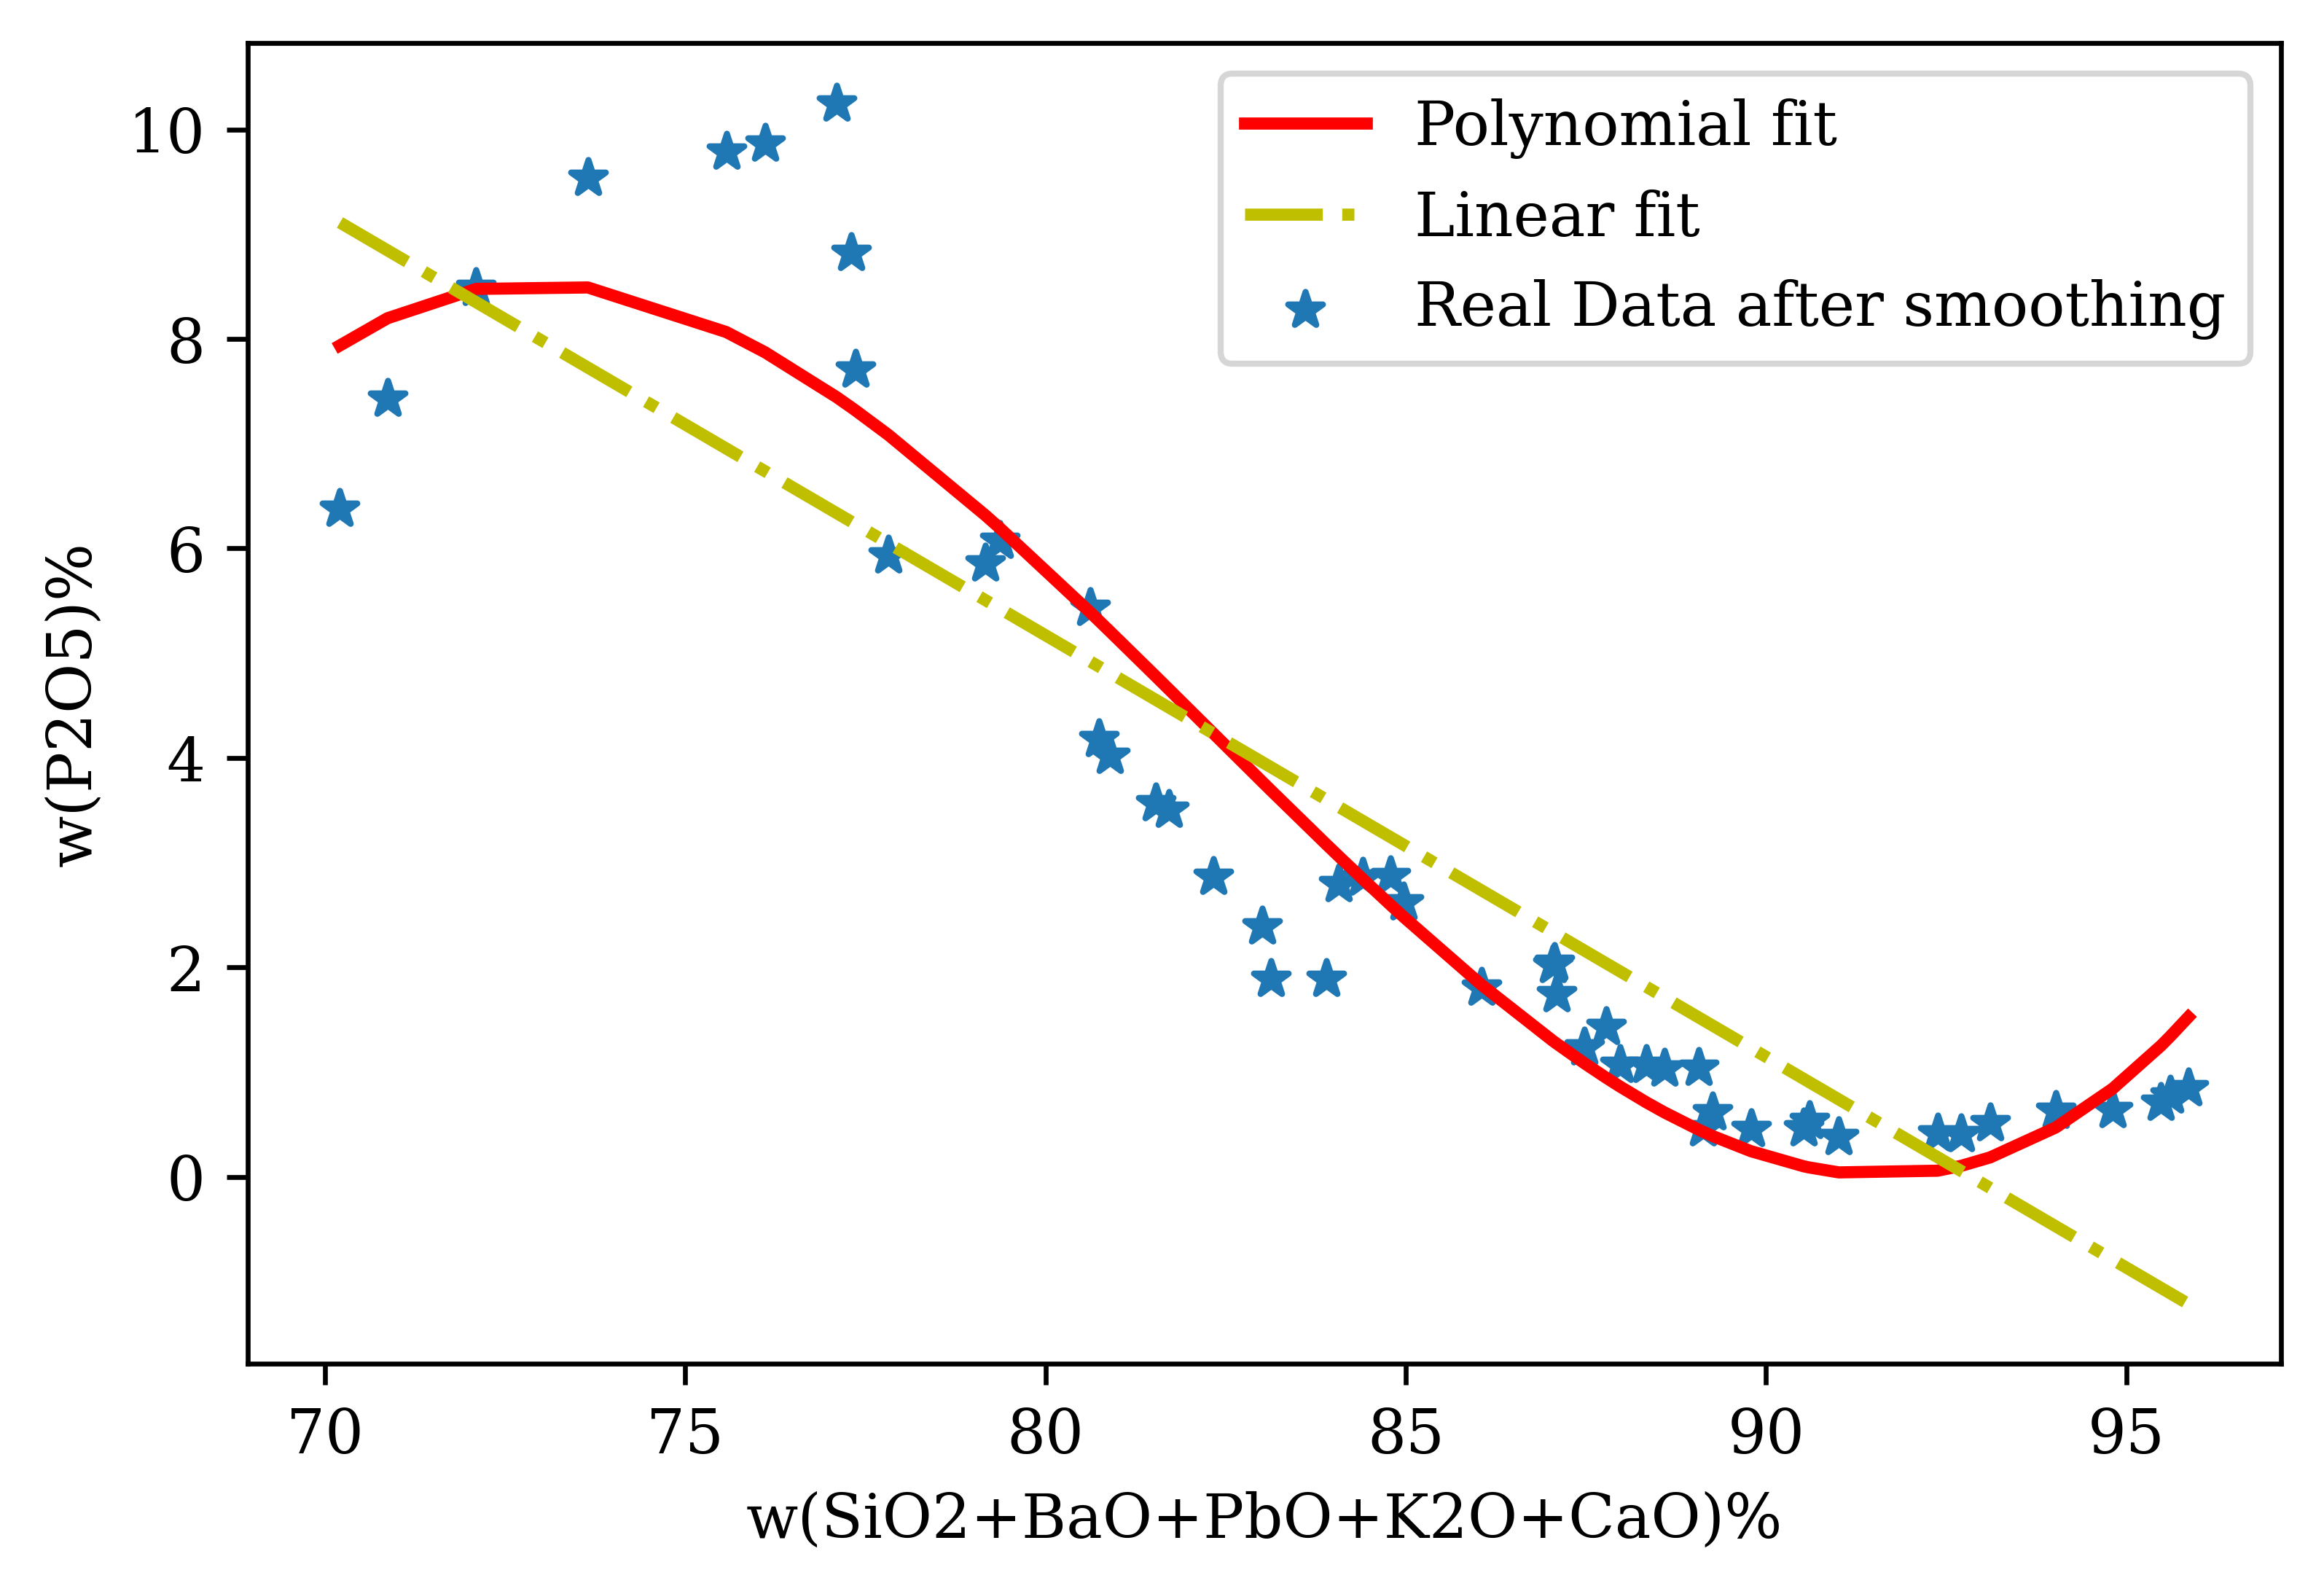

In [678]:
model1_1=np.poly1d(np.polyfit(df['主要成分'],y_P_sm,deg=1))
model1_2=np.poly1d(np.polyfit(df['主要成分'],y_P_sm,deg=3))

y_pre0=model1_1(df['主要成分'])
y_pre=model1_2(df['主要成分'])
plt.figure(dpi=600)
plt.scatter(df['主要成分'],y_P_sm,label='Real Data after smoothing',marker='*')
plt.plot(df['主要成分'],y_pre,c='r',lw=2,label='Polynomial fit')
plt.plot(df['主要成分'],y_pre0,ls='-.',lw=2,label='Linear fit',c='y')
plt.xlabel('w(SiO2+BaO+PbO+K2O+CaO)%')
plt.ylabel('w(P2O5)%')
plt.legend()
plt.savefig('五氧化二磷(P2O5).jpg')

print(goodness_of_fit(y_pre,y_P_sm))
print(goodness_of_fit(y_pre0,y_P_sm))
print(model1_2)

In [679]:
#问题结果！！
print(model1_2([x_pre['25%'],x_pre['75%']]))

[0.94626479 0.04204404]
